# Conjunto de Dados
## Análise das vendas jogos de video game

# Dicionário
1. Nome - Nome dos jogos
2. Plataforma - Plataforma para qual o jogo foi lançado
3. Ano - Ano de lançamento
4. Gênero - Gênero do jogo
5. Empresa - Empresa do jogo
6. AN_Vendas - Venda na America do Norte (em milhões)
7. UE_Vendas - Vendas na Europa (em milhões)
8. JP_Vendas - Vendas no Japão (em milhões)
9. Outros_Venda - Vendas no restante do mundo (em milhões)
10. Global_Vendas - Vendas em todo o mundo (em milhões)

Importar Bibliotecas

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

Importar Dados

In [13]:
df = pd.read_csv('/content/drive/MyDrive/pandas/vgsales.csv')
df = df.drop('Rank', axis=1)
df.columns = ['Nome', 'Plataforma', 'Ano', 'Genero', 'Empresa', 'AN_Vendas', 'UE_Vendas', 'JP_Vendas', 'Outros_Vendas', 'Global_Vendas']
mapeamento = {'Sports' : 'Esportes', 'Platform' : 'Plataforma', 'Racing' : 'Corrida', 'Role-Playing' : 'RPG', 'Puzzle' : 'Quebra-Cabeça', 'Misc':'Diversos','Shooter':'FPS', 'Simulation':'Simulador', 'Action':'Ação', 'Fighting' : 'Luta', 'Adventure' : 'Aventura','Strategy' : 'Estratégia'}
df['Genero'] = df['Genero'].replace(mapeamento)
df.head()

,Nome,Plataforma,Ano,Genero,Empresa,AN_Vendas,UE_Vendas,JP_Vendas,Outros_Vendas,Global_Vendas
0,Wii Sports,Wii,2006.0,Esportes,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Plataforma,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Corrida,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Esportes,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,RPG,Nintendo,11.27,8.89,10.22,1.00,31.37


## Pré-processamento dos dados
* Identificar valores ausentes
* Verificar outliers
* Existência de linhas duplicadas 

In [9]:
df.loc[df.duplicated(subset=['Nome', 'Plataforma', 'Empresa', 'Ano'])]
jogo_x = df[df['Nome'] == 'Madden NFL 13']
print(jogo_x.to_string())

                Nome Plataforma     Ano    Genero          Empresa  AN_Vendas  UE_Vendas  JP_Vendas  Outros_Vendas  Global_Vendas
506    Madden NFL 13       X360  2012.0  Esportes  Electronic Arts       2.53       0.16        0.0           0.17           2.86
603    Madden NFL 13        PS3  2012.0  Esportes  Electronic Arts       2.11       0.23        0.0           0.22           2.56
3730   Madden NFL 13        Wii  2012.0  Esportes  Electronic Arts       0.51       0.00        0.0           0.03           0.54
5588   Madden NFL 13        PSV  2012.0  Esportes  Electronic Arts       0.30       0.00        0.0           0.03           0.32
6792   Madden NFL 13       WiiU  2012.0  Esportes  Electronic Arts       0.22       0.00        0.0           0.02           0.24
16127  Madden NFL 13        PS3  2012.0  Esportes  Electronic Arts       0.00       0.01        0.0           0.00           0.01


In [10]:
df = df.drop_duplicates(subset=['Nome', 'Plataforma', 'Empresa', 'Ano'])

#### Remoção de um jogo duplicado -> Madden NFL 13 de PS3

In [27]:
df.dropna(inplace=True) #Remoção dos Valores NaN
df = df.loc[(df['Ano'] < 2017)] #Remoção dos anos com baixa quantia de dados

#### Remoção de 307 linhas do conjunto de dados que apresentavam valores nulos
#### Dos Anos de 2017 pra cima foram retirados por apresentar poucas informações, podendo até mesmo atrapalhar na análise

In [ ]:
fig = px.box(df[['AN_Vendas', 'UE_Vendas', 'JP_Vendas', 'Outros_Vendas', 'Global_Vendas']])
fig.update_layout(title='Boxplot', xaxis_title='Região', yaxis_title='Vendas')
fig.show()


#### Achei mais coerente não retirar os outliers do dataset devido o baixo valor que as vendas em milhões estão inseridos, pois aparece muito 0,0 dificultado o entendimento do boxplot

# Análise Descritiva dos Dados
#### Poderia utilizar o pandas-profiling também mas acabei não optando por essa escolha


In [14]:
dfSemAno = df.drop('Ano', axis=1)
dfSemAno.describe()


,AN_Vendas,UE_Vendas,JP_Vendas,Outros_Vendas,Global_Vendas
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


In [28]:
df_ano = df.groupby('Ano')['Nome'].count().reset_index()
df_ano.columns = ['Ano', 'Count']
df_ano = df_ano.sort_values('Count')
fig = px.bar(df_ano, x='Ano', y='Count', color='Ano')
fig.update_layout(title='Total de jogos por ano', xaxis_title='Ano', yaxis_title='Quantidade', showlegend=False)
fig.show()

In [ ]:
df_platforma_ano = df.groupby('Plataforma')['Nome'].count().reset_index()
df_platforma_ano.columns = ['Plataforma', 'Count']
df_platforma_ano = df_platforma_ano.sort_values('Count')
fig = px.bar(df_platforma_ano, x='Plataforma', y='Count', color='Plataforma')

fig.update_layout(title='Total de jogos por plataforma', xaxis_title='Plataforma', yaxis_title='Quantidade', showlegend=False)
fig.show()



#### As duas plataformas que apresetam mais jogos é o Ds(portátil) e o PS2(console)
##### Ds = 2131 Ps2 = 2127

In [16]:
df_platforma_soma = df.groupby('Plataforma')['Global_Vendas'].sum().reset_index()
df_platforma_soma.columns = ['Plataforma', 'Global_Vendas']
df_platforma_soma = df_platforma_soma.sort_values('Global_Vendas')
fig = px.bar(df_platforma_soma, x='Plataforma', y='Global_Vendas', color='Plataforma')

fig.update_layout(title='Total de vendas por plataforma', xaxis_title='Plataforma', yaxis_title='Quantidade', showlegend=False)
fig.show()


In [17]:
df_platform = df.groupby('Genero')['Nome'].count().reset_index()
df_platform.columns = ['Genero', 'Count']
df_platform = df_platform.sort_values('Count')
fig = px.bar(df_platform, x='Genero', y='Count', color='Genero')
fig.update_layout(title='Principais Gêneros de jogos', xaxis_title='Gênero', yaxis_title='Quantidade', showlegend=False)
fig.show()



In [18]:
total = df['Empresa'].value_counts().head(15).reset_index()
total.columns = ['Empresa', 'Quantidade']
fig = px.bar(total, x='Quantidade', y='Empresa', orientation='h', color='Quantidade')
fig.update_layout(title='top 20 empresas que mais lançaram', xaxis_title='Quantidade', yaxis_title='Empresas', showlegend=False)
fig.show()

#### São 577 empresas diferentes, dessa forma listei penas as 20 que mais lançaram jogos para o mercado

In [19]:
qt_por_regiao = df.groupby(['Genero']).sum(numeric_only=True)
qt_por_regiao = qt_por_regiao.drop(columns=['Ano', 'Global_Vendas'])
fig = px.imshow(qt_por_regiao, labels={'x': 'Região', 'y': 'Gênero'})
fig.update_layout(coloraxis_colorbar=dict(title='Vendas (milhões)'))
fig.update_layout(title="Distruibuição das vendas por região", width=1300, height=700)
fig.show()


In [20]:
vendas_por_empresa = df.groupby('Empresa')['Global_Vendas'].sum().reset_index()
vendas_por_empresa = vendas_por_empresa.sort_values('Global_Vendas')
fig = px.bar(vendas_por_empresa.tail(15), x='Empresa', y='Global_Vendas', color='Empresa')
fig.update_layout(title='Vendas Globais por Empresa', xaxis_title='Empresa', yaxis_title='Vendas Globais', showlegend=False)
fig.show()


In [21]:
vendas_e_jogos_por_empresa = df.groupby('Empresa').agg({'Nome': 'count', 'Global_Vendas': 'sum'}).reset_index()
vendas_e_jogos_por_empresa['Razão Vendas/Jogos'] = vendas_e_jogos_por_empresa['Global_Vendas'] / vendas_e_jogos_por_empresa['Nome']
vendas_e_jogos_por_empresa = vendas_e_jogos_por_empresa.sort_values('Razão Vendas/Jogos')
fig = px.bar(vendas_e_jogos_por_empresa.tail(15), x='Empresa', y='Razão Vendas/Jogos', color='Empresa')
fig.update_layout(title='Razão entre Vendas Globais e Número de Jogos Produzidos por Empresa (Top 15)', xaxis_title='Empresa', yaxis_title='Razão Vendas/Jogos', showlegend=False)
fig.show()

## Esse gráfico me fez pensar em algumas coisas
### Primeiramente quem é Palcom?

In [22]:
print('Jogos produzidos pela Palcom')
linha_Palcom = df.loc[df['Empresa'] == 'Palcom']
print(linha_Palcom.to_string(index=False))
print('----------------------------------------------------------------------------------------------------------------------------------------')

jogos_nintendo = df['Empresa'].value_counts()['Nintendo']
print('Quantidade de jogos produzidos pela Nintendo = ', jogos_nintendo)

Jogos produzidos pela Palcom
                        Nome Plataforma    Ano Genero Empresa  AN_Vendas  UE_Vendas  JP_Vendas  Outros_Vendas  Global_Vendas
Teenage Mutant Ninja Turtles        NES 1989.0   Ação  Palcom       3.38       0.44       0.31           0.04           4.17
----------------------------------------------------------------------------------------------------------------------------------------
Quantidade de jogos produzidos pela Nintendo =  703


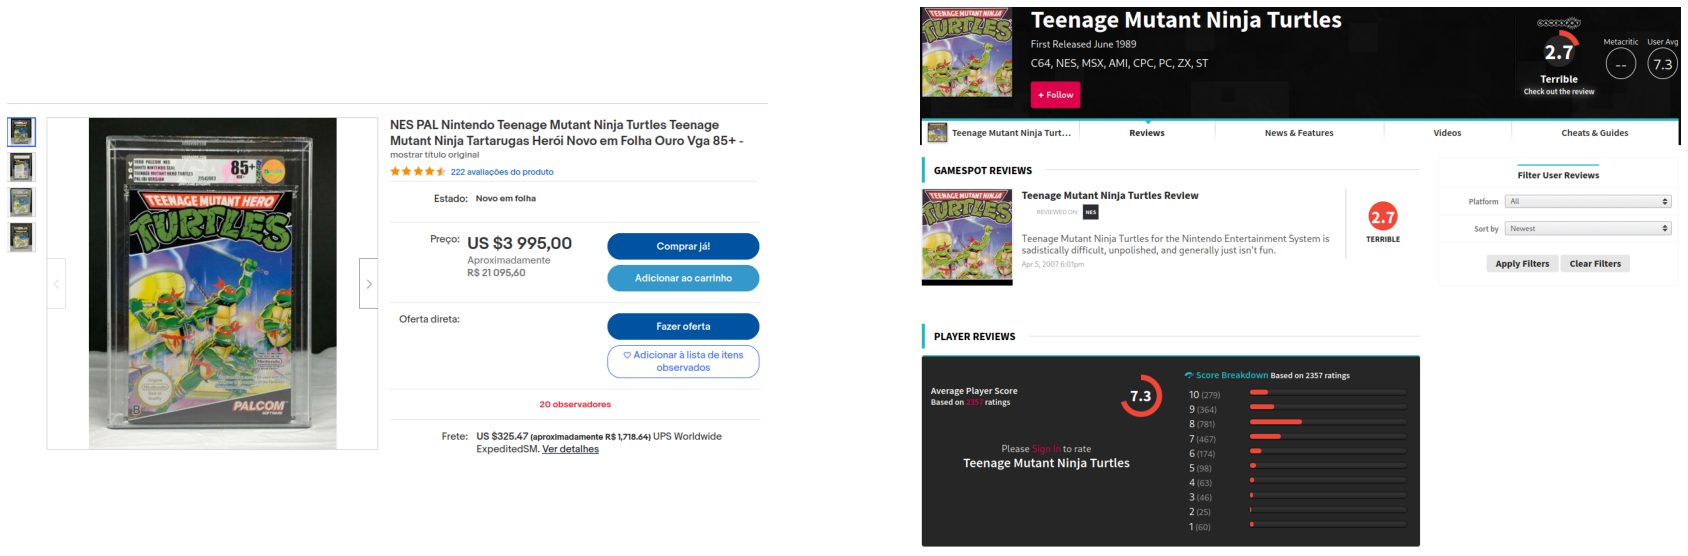

In [23]:
imagem1 = mpimg.imread('/content/drive/MyDrive/pandas/assets/gamespot.png')
imagem2 = mpimg.imread('/content/drive/MyDrive/pandas/assets/tmnt_ebay.png')
fig, axs = plt.subplots(1, 2, figsize=(30, 10))
axs[0].imshow(imagem2)
axs[0].axis('off')
axs[1].imshow(imagem1)
axs[1].axis('off')
plt.show()

#### Agora nos deparamos com um jogo péssimo e custando 21 mil reais devido o valor de colecionador (essa informação me pegou desprevenido) Cowabunga!!!

In [24]:
df_min = df.loc[df['Global_Vendas'] == 0.01]
print(df['Global_Vendas'].min())
df_min.head()

0.01


,Nome,Plataforma,Ano,Genero,Empresa,AN_Vendas,UE_Vendas,JP_Vendas,Outros_Vendas,Global_Vendas
15980,Turok,PC,2008.0,Ação,Touchstone,0.00,0.01,0.00,0.0,0.01
15981,Coven and Labyrinth of Refrain,PSV,2016.0,Ação,Nippon Ichi Software,0.00,0.00,0.01,0.0,0.01
15982,Super Battle For Money Sentouchuu: Kyuukyoku n...,3DS,2016.0,Ação,Namco Bandai Games,0.00,0.00,0.01,0.0,0.01
15983,Dragon Zakura DS,DS,2007.0,Diversos,Electronic Arts,0.00,0.00,0.01,0.0,0.01
15984,Chameleon: To Dye For!,DS,2006.0,Quebra-Cabeça,505 Games,0.01,0.00,0.00,0.0,0.01


#### Como podemos ver não conseguimos retirar o menor valor do nosso dataset, devido a quantidade de valores repetidos

In [25]:
maiores_por_plataforma = df.groupby('Plataforma')['Global_Vendas'].idxmax()
jogo_por_plataforma = df.loc[maiores_por_plataforma, ['Plataforma', 'Nome', 'Global_Vendas']].reset_index()
jogo_por_plataforma.columns = ['Index','Plataforma', 'Nome', 'Global_Vendas']
jogo_por_plataforma = jogo_por_plataforma.sort_values('Global_Vendas')
fig = px.bar(jogo_por_plataforma, x='Plataforma', y='Global_Vendas', color='Nome', text = 'Nome')
fig.update_layout(title='Jogos mais vendidos por Plataforma', xaxis_title='Empresa', yaxis_title='Vendas no Mundo', showlegend=False)

fig.show()

In [26]:
jogos_mais_vendidos_an = df[df['AN_Vendas'] == df['AN_Vendas'].max()]
jogos_mais_vendidos_jp = df[df['JP_Vendas'] == df['JP_Vendas'].max()]
jogos_mais_vendidos_ue = df[df['UE_Vendas'] == df['UE_Vendas'].max()]
jogos_mais_vendidos_outros = df[df['Outros_Vendas'] == df['Outros_Vendas'].max()]

print(jogos_mais_vendidos_an.to_string())
print('___________________________________________________________________________________________________________________________________________')
print(jogos_mais_vendidos_jp.to_string())
print('___________________________________________________________________________________________________________________________________________')
print(jogos_mais_vendidos_ue.to_string())
print('___________________________________________________________________________________________________________________________________________')
print(jogos_mais_vendidos_outros.to_string())


         Nome Plataforma     Ano    Genero   Empresa  AN_Vendas  UE_Vendas  JP_Vendas  Outros_Vendas  Global_Vendas
0  Wii Sports        Wii  2006.0  Esportes  Nintendo      41.49      29.02       3.77           8.46          82.74
___________________________________________________________________________________________________________________________________________
                       Nome Plataforma     Ano Genero   Empresa  AN_Vendas  UE_Vendas  JP_Vendas  Outros_Vendas  Global_Vendas
4  Pokemon Red/Pokemon Blue         GB  1996.0    RPG  Nintendo      11.27       8.89      10.22            1.0          31.37
___________________________________________________________________________________________________________________________________________
         Nome Plataforma     Ano    Genero   Empresa  AN_Vendas  UE_Vendas  JP_Vendas  Outros_Vendas  Global_Vendas
0  Wii Sports        Wii  2006.0  Esportes  Nintendo      41.49      29.02       3.77           8.46          82.74
__